In [149]:
using Plots
using LaTeXStrings

## Integración: Regla de Simpson


La regla de Simpson es una regla que usa 3 puntos equiespaciados para aproximar la integral de una función:

$$
I_S(f)[a,b] = [f(a) + 4f(\frac{a+b}{2}) + f(b)]\frac{b-a}{6}
$$

Dicha regla de aproximación se puede obtener integrando el polinomio interpolante basado en los tres puntos: $x_0 = a, x_1 = \frac{a+b}{2}, x_2 = b$

Recordemos las otras dos reglas que vimos: 

Trapecio: 

$$
I_T(f)[a,b] = [f(a) + f(b)]\frac{b-a}{2}
$$

Punto medio:

$$
I_{PM}(f)[a,b] = [f(\frac{a+b}{2})](b-a)
$$

Ambas tenían un error que dependia de la derivada segunda de $f$, o sea que eran exactas para funciones lineales.

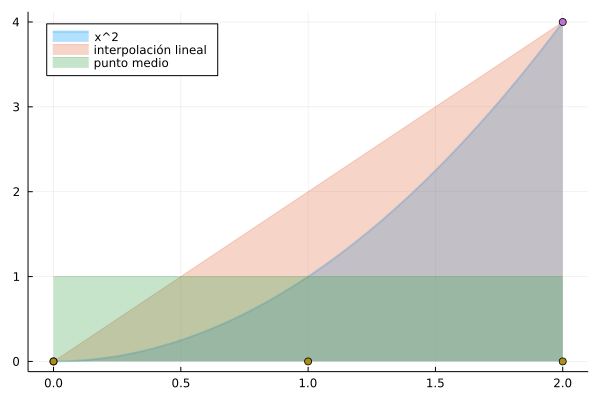

In [150]:
h(x) = x^2
x = [0:0.01:2]
plot(xlim=(-0.1,2.1))
plot!(x,h,label="x^2", lw= 2, legend=:topleft,fillrange = 0, alpha=0.3)
plot!([0;2],[h(0);h(2)],label="interpolación lineal",fillrange = 0, alpha=0.3)
plot!([0;2],[h(1);h(1)], label="punto medio",fillrange = 0, alpha=0.3)
scatter!([0;2],[h(0); h(2)], ms=4, label="")
scatter!([0;1;2],[0; 0; 0], ms=4, label="")

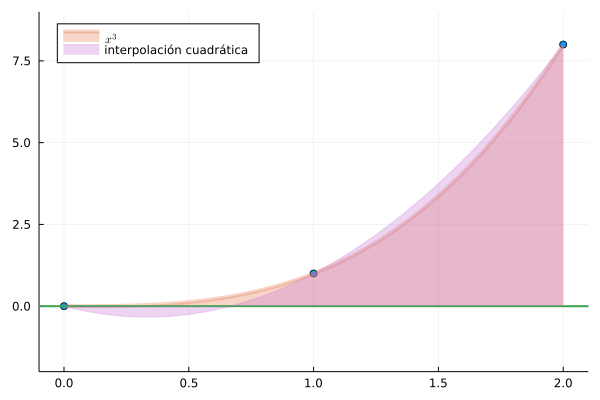

In [160]:
l(x) = x^3
plot(xlim=(-0.1,2.1), ylim=(-2,9), legend=:topleft)
scatter!([0;1;2],[h(0); l(1); l(2)], ms=4, label="")
plot!(x,l, lw=4, label=L"x^3",fillrange = 0, alpha=0.3)
#plot!([0; 2], [l(0);l(2)], label="interpolación lineal",fillrange = 0, alpha=0.3)
#plot!([0;2],[l(1);l(1)], label="punto medio",fillrange = 0, alpha=0.3)
hline!([0], label="", lw=2)
L(x) = l(0)*(x-1)*(x-2)/2 + l(1)*x*(x-2)/(-1) + l(2)*x*(x-1)/2
plot!(x,L, label="interpolación cuadrática",fillrange = 0, alpha=0.3)


La regla de Simpson, al tener 3 puntos, y haberse obtenido integrando el polinomio interpolante de 3 puntos, es exacta para polinomios de grado 2. Recordemos que el polinomio interpolante de 3 puntos en una cuadrática y por lo tanto el polinomio interpolante de una cuadrática coincide exáctamente con la misma.

O sea, si $P_2(x)$ es cualquier cuadrática, $P_2(x) = Int_3(P_2(x))$ y por lo tanto,

$$
I_S(P_2(x))[a,b] = \int_a^b Int_3(P_2(x))\;dx = \int_a^b P_2(x)\;dx.
$$

Por lo tanto su error debiera ser proporcional a la derivada tercera de $f$, $f^{'''}$.
Pero aquí se da un fenómeno similar al que vimos con las derivadas centradas y el error es aún más pequeño!.

Veamos: 

Si tomamos una función constante, $f_0 = 1$ luego la regla nos da:

$$
I_S(f_0)[a,b] = [f_0(a) + 4f_0(\frac{a+b}{2}) + f_0(b)]\frac{b-a}{6} = [1 + 4 + 1]\frac{b-a}{6} = (b-a) = \int_a^b 1 \; dx
$$

Veamos ahora con una lineal. A cualquir lineal $Ax + B$ la podemos escribir como 

$$
C(x - \frac{a+b}{2}) + D
$$ 

Como ya sabemos que es exacta para las constantes (D) y que si multiplicamos una función por una constante esta sale fuera de la regla, basta con que probemos con la función:

$$
f_1 = x - \frac{a+b}{2}
$$

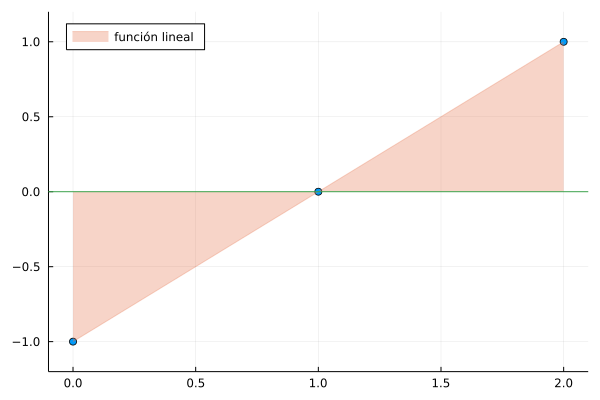

In [142]:
a = 0
b = 2
f_1(x) = x - (a+b)/2
plot(xlim=(-0.1,2.1), ylim=(-1.2,1.2), legend=:topleft)
scatter!([a;(a+b)/2;b],[f_1(0); f_1(1); f_1(2)], ms=4, label="")
plot!(x,f_1,fillrange = 0, alpha=0.3, label="función lineal")
hline!([0],label="")

Del gráfico se ve que la integral de esta función se anula!
Por otro lado, como $f_1(a)= - f_1(b)$ y $f_1(\frac{a+b}{2})=0$ vemos que la regla de Simpson nos da también cero.

**Pero también nos da cero para cualquier función que sea impar con respecto al punto medio!**  

Verifiquemos ahora que es exacta para polinomios de segundo orden. Basta considerar,

$$
f_2(x) = (x - \frac{a+b}{2})^2
$$

En efecto, la regla de Simpson nos da:

$$
I_S(f_2)[a,b] = [f_2(a) + 4f_2(\frac{a+b}{2}) + f_2(b)]\frac{b-a}{6} = [(\frac{a-b}{2})^2 + (\frac{-a+b}{2})^2]\frac{b-a}{6} = \frac{(b-a)^3}{12} 
$$

Por otro lado:

$$
\int_a^b f_2(x)\; dx = \int_a^b (x - \frac{a+b}{2})^2 \; dx = \frac{1}{3}(x - \frac{a+b}{2})^3|_a ^b = \frac{1}{12}(b-a)^3
$$

**Como es exacta para polinomios de segundo orden y es exacta para polinomios impares (en $\frac{a+b}{2}$) también es exacta para todo polinomio de tercer orden!**

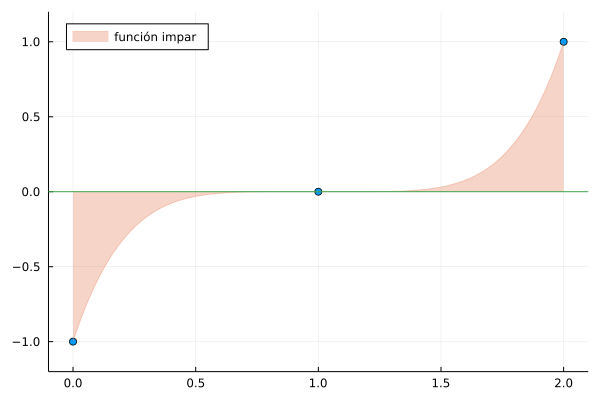

In [144]:
ll(x) = (x-1)^3*(x-1)^2
plot(xlim=(-0.1,2.1), ylim=(-1.2,1.2), legend=:topleft)
scatter!([a;(a+b)/2;b],[ll(0); ll(1); ll(2)], ms=4, label="")
plot!(x,ll,fillrange = 0, alpha=0.3, label="función impar")
hline!([0],label="")

#### Cálculo del error de la regla de Simpson

Cómo dependerá de la derivada 4ta de la función (que supondremos con derivada cuarta continua) el error tendrá la forma:

$$
Error_S(f) = C |f^{iv}(\zeta)|(b-a)^5
$$
Donde $C$ es una constante numérica.
Lo encontraremos entonces será el valor numérico de dicha constante.
Lo haremos expandiendo $f$ en serie de Taylor.

Para escribir menos usaremos $x_1 = \frac{a+b}{2}$ y expandiremos a $f$ en serie de Taylor con respecto al punto medio:

$$
f(x) = f(x_1) + f^{'}(x_1)(x-x_1) + \frac{f^{''}(x_1)}{2}(x-x_1)^2 + \frac{f^{'''}(x_1)}{6}(x-x_1)^3 + \frac{f^{iv}(\zeta(x))}{24}(x-x_1)^4
$$

Ya tenemos las primeras 4 integrales, las de una constante, una función lineal impar, una cuadrática, una cúbica impar, solo resta la última!

$$
\int_a^b f(x)\; dx = f(x_1)(b-a) + \frac{f^{''}(x_1)}{2}\frac{1}{12}(b-a)^3 + \int_a^b \frac{f^{iv}(\zeta(x))}{24}(x-x_1)^4 \;dx
$$

Recordamos ahora la aproximación a la derivada segunda con diferencias finitas centradas:

$$
f^{''}(x_1) = \frac{f(x_0) + f(x_2) - 2f(x_1)}{(\frac{b-a}{2})^2} + \frac{f^{iv}(\bar{\zeta}(x))}{12}(\frac{b-a}{2})^2
$$

Substituyendo obtenemos:

$$
\int_a^b f(x)\; dx = f(x_1)(b-a) + \frac{1}{6}[f(x_0) + f(x_2) - 2f(x_1)](b-a) + \frac{f^{iv}(\bar{\zeta}(x))}{1152}(b-a)^5  + \int_a^b \frac{f^{iv}(\zeta(x))}{24}(x-x_1)^4 \;dx
$$

$$
\int_a^b f(x)\; dx = \frac{1}{6}[f(x_0) + f(x_2) + 4f(x_1)](b-a) + \frac{f^{iv}(\bar{\zeta}(x))}{1152}(b-a)^5  + \int_a^b \frac{f^{iv}(\zeta(x))}{24}(x-x_1)^4 \;dx
$$

$$
\int_a^b f(x)\; dx = I_S(f)[a,b] + \frac{f^{iv}(\bar{\zeta}(x))}{1152}(b-a)^5   + \int_a^b \frac{f^{iv}(\zeta(x))}{24}(x-x_1)^4 \;dx
$$

$$
C = \max_{\zeta \in [a,b]}\{|f^{iv}(\zeta)|\}
$$

$$
Error_S(f) \leq C \frac{(b-a)^5}{1152} + C \int_a^b \frac{1}{24}(x-x_1)^4 \;dx\;\;\;\; 
$$


$$
Error_S(f) \leq C \frac{(b-a)^5}{720} \;\;\;\;\; \text{con un poco más de trabajo}\;\;\;\; \leq C \frac{(b-a)^5}{2880}
$$

Veamos:

Tomemos $a=0$, $b=1$, $f_4(x) = (x-0.5)^4$. La derivada $4^{ta}$ es: $f^{iv}(x) = 24$

$$
I_S(f_4)[0,1] = [\frac{-1}{2}^4 + \frac{1}{2}^4]\frac{1}{6} = \frac{1}{6*8} = \frac{1}{48}
$$

$$
\int_0^1 (x-0.5)^4 \; dx = \frac{1}{5}[(\frac{1}{2})^5 - (\frac{-1}{2})^5)] = \frac{1}{5*2^4} = \frac{1}{80}
$$

In [17]:
(1//48 - 1//80)

1//120

El error es: 

$$
\frac{1}{120}
$$

La estimación es:

$$
\frac{24}{720} = \frac{1}{30} \;\;\;\;\;\;\;\frac{24}{2880} = \frac{1}{120}
$$

In [25]:
function I_S(f, a, b)
    return (f(a) + 4f((a+b)/2) + f(b)) * (b-a) / 6
end

I_S (generic function with 1 method)

In [161]:
a = 0
b = 1
f_4(x) = (x - (a+b)/2)^4

I_S(f_4,a,b) - 1/48 #Diferencia con el cálculo manual

0.0

In [162]:
I_S(f_4,a,b) - 1/80 #Diferencia con el valor exacto, o sea el error

0.008333333333333331

In [101]:
function I_T(f,a,b)
    return (f(a)+f(b))*(b-a)/2
end

I_T (generic function with 1 method)

In [163]:
I_T(f_4,a,b) - 1/80 #Error

0.05

In [103]:
function I_PM(f,a,b)
    return f((a+b)/2)*(b-a)
end

I_PM (generic function with 1 method)

In [104]:
I_PM(f_4,a,b) - 1/80 #Error

-0.0125

#### Ejemplos:

$$
I = \int_0^2 e^x \; dx = e^2 - e^0 = e^2 - 1 =  6.38905609893065
$$

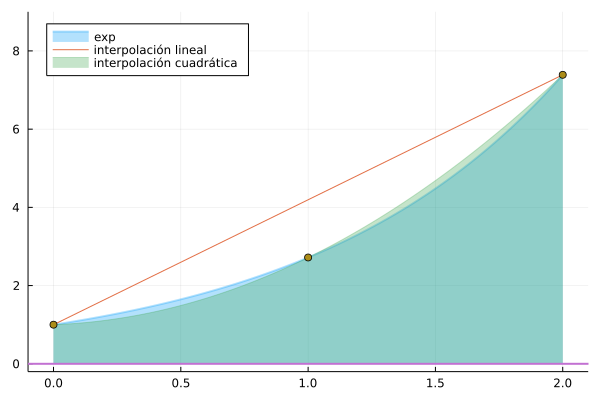

In [166]:
a=0
b=2
plot(xlim=(-0.1,2.1), ylim=(-0.2,9), legend=:topleft)
plot!(x,exp, lw=2, label="exp",fillrange = 0, alpha=0.3)
plot!([0; 2], [exp(0);exp(2)], label="interpolación lineal")
#plot!([0;2],[exp(1);exp(1)], label="punto medio",fillrange = 0, alpha=0.3)
Lexp(x) = exp(0)*(x-1)*(x-2)/2 + exp(1)*x*(x-2)/(-1) + exp(2)*x*(x-1)/2
plot!(x,Lexp, label="interpolación cuadrática",fillrange = 0, alpha=0.3)
hline!([0], label="", lw=2)
scatter!([a;(a+b)/2;b],[exp(a); exp((a+b)/2); exp(b)], ms=4, label="")



In [167]:
I = exp(2) - 1

6.38905609893065

In [168]:
I_T(exp, 0, 2)

8.38905609893065

In [169]:
I_S(exp, 0, 2)

6.42072780425561

In [170]:
I_PM(exp, 0, 2)

5.43656365691809

Error de Trapecio:

In [39]:
I - I_T(exp, 0, 2)

-2.0

Error relativo:

In [50]:
(I - I_T(exp, 0, 2))/I

-0.3130352854993313

Error del Punto Medio:

In [67]:
I - I_PM(exp, 0, 2)

0.9524924420125602

Error relativo:

In [62]:
(I - I_PM(exp, 0, 2))/I

0.14908187176067852

Error Simpson:

In [54]:
I - I_S(exp, 0, 2)

-0.031671705324959554

Error relativo:

In [51]:
(I - I_S(exp, 0, 2))/I

-0.004957180659324703

Recordemos las cotas: 

$$
Error_T = C_2 \frac{(b-a)^3}{12}
$$

$$
Error_{MP} = C_2 \frac{(b-a)^3}{24}
$$

$$
C_2 = \max_{\zeta \in [a,b]}\{|f^{''}(\zeta)|\}
$$


$$
Error_S = C_4 \frac{(b-a)^5}{2880}
$$

$$
C_4 = \max_{\zeta \in [a,b]}\{|f^{iv}(\zeta)|\}
$$



En este caso:

$$
C_2 = C_4 = e^2 = 7.38905609893065
$$

|f | a | b | I | I_T | I_PM | I_S | E_T | I - I_T| E_PM | I - I_PM | E_S | I-I_S|
|--|---|---|---|-----|------|-----|-----|--------|------|----------|-----|------|
|exp|0|2|6.38|8.38|5.43|6.42|4.92|-2.00|2.46| 0.952|0.082 |-0.031|

#### Ejemplo 2:

$$
g(x) = \sqrt{1+x^2}
$$

$$
I_g = \int_0^2 \sqrt{1+x^2}\; dx = \sqrt{5} + \frac{1}{2}sinh^{-1}(2) = 2.95789
$$

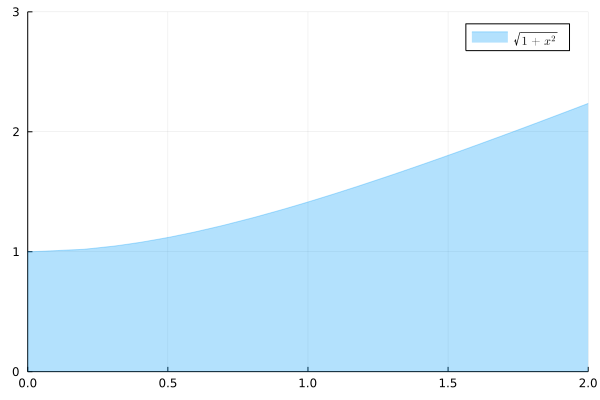

In [156]:
g(x) = sqrt(1+x^2)
plot(g, xlim=(0,2), ylim=(0,3), label=L"\sqrt{1+x^2}",fillrange = 0, alpha=0.3)

In [73]:

Ig = 2.95789
println("I = $(Ig)")
println("I_T = $(I_T(g,0,2))")
println("I_PM = $(I_PM(g,0,2))")
println("I_S = $(I_S(g,0,2))")

I = 2.95789
I_T = 3.23606797749979
I_PM = 2.8284271247461903
I_S = 2.96430740899739


In [82]:
println("I_g - I_T = $(Ig - I_T(g,0,2))")
println("I_g - I_PM = $(Ig - I_PM(g,0,2))")
println("I_g - I_S = $(Ig - I_S(g,0,2))")

I_g - I_T = -0.2781779774997899
I_g - I_PM = 0.12946287525380962
I_g - I_S = -0.006417408997390073


#### Cotas del error

$$
g^{'}(x) = x(1+x^2)^{-\frac{1}{2}}
$$

$$
g^{''}(x) = (1+x^2)^{-\frac{3}{2}}
$$

$$
g^{'''}(x) = -3x(1+x^2)^{-\frac{5}{2}}
$$

$$
g^{iv}(x) = (12x^2 - 3) (1+x^2)^{-\frac{7}{2}}
$$

$$
g^{v}(x) = (45x - 60x^3) (1+x^2)^{-\frac{9}{2}}
$$

El máximo de $|g^{''}(x)|$ está en $x=1$.

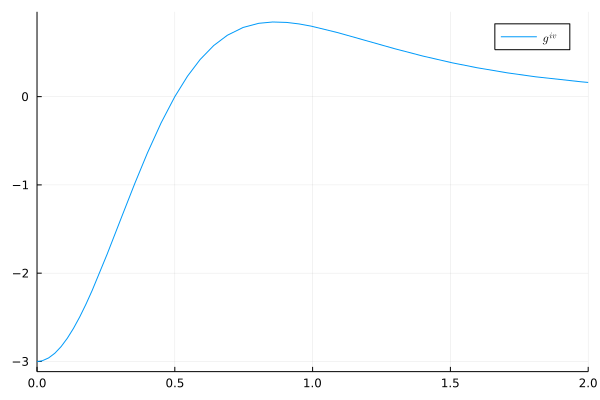

In [157]:
g_4(x) = (12x^2 - 3)*(1+x^2)^(-7/2)
plot(g_4,xlim=(0,2),label=L"g^{iv}")

El máximo del valor absoluto de $g^{iv}$ está también en $x=0$ y vale 3.

In [121]:
println("E_T = $(1/12*2^3)")
println("E_PM = $(1/24*2^3)")
println("E_S = $(3/2880*2^5)")

E_T = 0.6666666666666666
E_PM = 0.3333333333333333
E_S = 0.03333333333333333


|f | a | b | I | I_T | I_PM | I_S | E_T | I - I_T| E_PM | I - I_PM | E_S | I-I_S|
|--|---|---|---|-----|------|-----|-----|--------|------|----------|-----|------|
|$e^x$|0|2|6.38|8.38|5.43|6.42|4.92|-2.00|2.46| 0.952|0.082 |-0.031|
|sqrt(1 + x^2) |0|2|2.95| 3.23 |2.82 |2.96|0.66|-0.28 |0.33|0.13 |0.03|-0.006 |
